logistic Regression Task

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
180,6317-YPKDH,Female,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),29.95,29.95,Yes


In [4]:
df = df.drop("customerID", axis=1)

In [5]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [6]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [7]:
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])

In [8]:
x = df.drop("Churn", axis=1)
y = df["Churn"]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=40)

In [10]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [12]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)

In [13]:
print("accu",accuracy_score(y_test,y_pred))

accu 0.7885024840312278


In [14]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[907 127]
 [171 204]]


In [15]:
new_customer = pd.DataFrame({
    'gender':[1],
    'SeniorCitizen':[0],
    'Partner':[1],
    'Dependents':[0],
    'tenure':[12],
    'PhoneService':[1],
    'MultipleLines':[0],
    'InternetService':[1],
    'OnlineSecurity':[0],
    'OnlineBackup':[1],
    'DeviceProtection':[0],
    'TechSupport':[0],
    'StreamingTV':[1],
    'StreamingMovies':[1],
    'Contract':[0],
    'PaperlessBilling':[1],
    'PaymentMethod':[2],
    'MonthlyCharges':[70],
    'TotalCharges':[850]
})

In [16]:
new_customer_scaled = scaler.transform(new_customer)

In [17]:
predict = model.predict(new_customer_scaled)
prob = model.predict_proba(new_customer_scaled)
print("Prediction:", predict)
print("Churn probability:", prob[0][1])

Prediction: [1]
Churn probability: 0.5373898067401265


Text(0.5, 1.0, 'Confusion Matrix Heatmap')

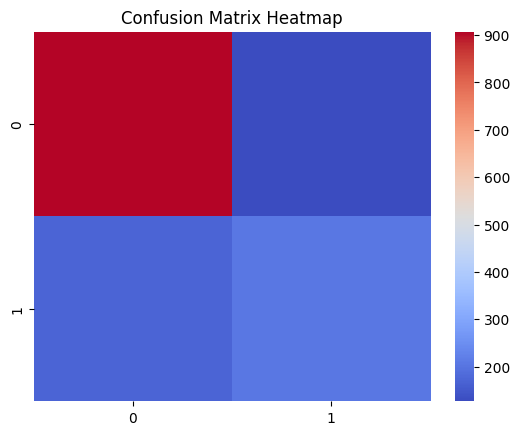

In [18]:
sns.heatmap(cm,cmap="coolwarm")
plt.title("heatmap")
plt.title("Confusion Matrix Heatmap")

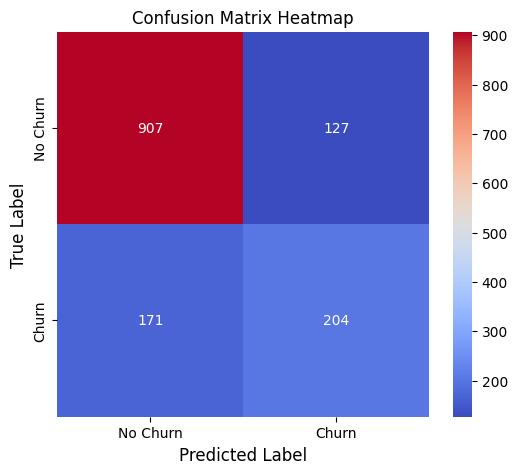

In [19]:
cm = confusion_matrix(y_test, y_pred)
class_names = ["No Churn", "Churn"]
plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",              # shows integer values
    cmap="coolwarm",
    cbar=True,
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()